# Στοχαστικές Ανελίξεις
## Εργαστήριο 6

Όνομα : Μάριος Παπαχρήστου

ΑΜ: 03115101

email: papachristoumarios@gmail.com

#### Δειγματοληψία απόρριψης σε μεγάλες διαστάσεις.

Στο προηγούμενο εργαστήριο μάθαμε πώς μπορούμε να επιλέξουμε ομοιόμορφα ένα δείγμα από ένα χωρίο $D$ του επιπέδου και χρησιμοποιήσαμε αυτή τη μέθοδο για να υπολογίσουμε το εμβαδόν του δίσκου. Αυτή η μέθοδος μπορεί να επεκταθεί με προφανή τρόπο και σε περισσότερες διαστάσεις. Η ιδέα ότι αν πάρουμε τυχαία ένα σημείο μέσα στον κύβο με κέντρο το 0 και πλευρά 2, τότε η πιθανότητα αυτό να βρεθεί μέσα στη μοναδιαία μπάλα είναι 

$$p(d)=\frac{\omega(d)}{2^d}.$$

Επομένως αν πάρουμε έναν μεγάλο αριθμό $N$ από σημεία μέσα στον κύβο, από τον νόμο των μεγάλων αριθμών, το ποσοστό από αυτά που θα "πέσουν" μέσα στη μπάλα είναι μια καλή εκτίμηση της $p(d)$. Αυτό ακριβώς κάνει η συνάρτηση *vol* που ορίζεται στην παρακάτω ρουτίνα.

In [2]:
from numpy import random
from matplotlib import pyplot as plt
def vol(N,d):
    nhits = 0
    for i in range(N):
        x = random.uniform(-1,1,d)
        if sum(x ** 2) < 1: 
            nhits += 1
    if nhits == 0:
        return -1
    return 2 ** d * nhits / N

d = 3
N = 10000       
print ("The Monte Carlo estimate of ω(", d,") is  : %.5f " % vol (N,d))


The Monte Carlo estimate of ω( 3 ) is  : 4.22480 


Η παρακάτω συνάρτηση επιστρέφει τον όγκο της μοναδιαίας μπάλας σε $d$ διαστάσεις χρησιμοποιώντας τον αναλυτικό τύπο: 
    $$\omega(d) =\frac{\pi^{d/2}}{\Gamma\big(\frac{d}{2}+1\big)}$$ 
    

In [3]:
from math import gamma, pi 

def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)

print("The actual value of ω(", d,") is  : %.5f " % Vol1(d))

The actual value of ω( 3 ) is  : 4.18879 


## Παραδοτέο 1

(α) Η ρουτίνα που ζητείται για την εκτίμιση του όγκου της μπάλλας d διαστάσεων με Monte Carlo δίνεται παρακάτω: 

In [7]:
N = 10e6

def print_volumes(N = 1000000):
    d = 2
    mc = []
    actual = []
    rerror = []
    pd = []
    while 1 == 1:
        v1 = vol(N, d)
        if v1 == -1: break
        v2 = Vol1(d)
        mc.append(v1)
        actual.append(v2)
        print(d)
        print ("The Monte Carlo estimate of ω(", d,") is  : %.5f " % v1)
        print("The actual value of ω(", d,") is  : %.5f " % v2)
        r = abs(v2 - v1) / v2
        print('Relative error is {}'.format(r))
        rerror.append(r)
        pd.append(v1 / 2**d)
        d += 1
    return mc, actual, rerror, pd    
        
mc, actual, rerror, pd = print_volumes()        
        
        

2
The Monte Carlo estimate of ω( 2 ) is  : 3.14278 
The actual value of ω( 2 ) is  : 3.14159 
Relative error is 0.000376670861148955
3
The Monte Carlo estimate of ω( 3 ) is  : 4.19320 
The actual value of ω( 3 ) is  : 4.18879 
Relative error is 0.0010527610594034018
4
The Monte Carlo estimate of ω( 4 ) is  : 4.94102 
The actual value of ω( 4 ) is  : 4.93480 
Relative error is 0.00126080017039668
5
The Monte Carlo estimate of ω( 5 ) is  : 5.26182 
The actual value of ω( 5 ) is  : 5.26379 
Relative error is 0.00037330787938701435
6
The Monte Carlo estimate of ω( 6 ) is  : 5.19949 
The actual value of ω( 6 ) is  : 5.16771 
Relative error is 0.006148797602045338
7
The Monte Carlo estimate of ω( 7 ) is  : 4.72563 
The actual value of ω( 7 ) is  : 4.72477 
Relative error is 0.00018329578100516073
8
The Monte Carlo estimate of ω( 8 ) is  : 4.11597 
The actual value of ω( 8 ) is  : 4.05871 
Relative error is 0.014106906772365833
9
The Monte Carlo estimate of ω( 9 ) is  : 3.30189 
The actual va

(β) Το σχετικό σφάλμα αυξάνεται διότι ο όγκος της σφαίρας είναι πολύ μικρότερος σε σχέση με τον όγκο του κύβου επομένως ολοένα και λιγότερα σημεία θα πέφτουν μέσα στη σφαίρα με αποτέλεσμα η εκτίμησή μας να χαλάει μετά από κάποιο $d$. 

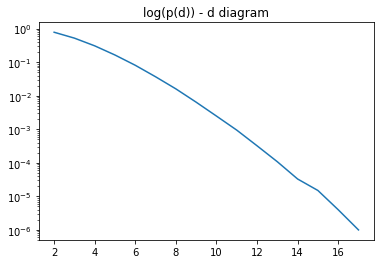

In [10]:
plt.figure();
plt.semilogy(range(2, len(pd) + 2), pd);
plt.title('log(p(d)) - d diagram');

(γ) Αν θεωρήσουμε ότι τα $N$ τυχαία δείγματα λαμβάνονται σε $O(1)$ και αθροίζονται σε $O(d)$ σημαίνει ότι η συνολική πολυπλοκότητα είναι $O(dN)$. Αν ο υπολογιστής μας κάνει 10^6 πράξεις το δευτερόλεπτο θα χρειαστούμε $N = $ δείγματα άρα δεύτερα. Ένας (επιπόλαιος) τρόπος να βρούμε το ελάχιστο Ν είναι ο ακόλουθος
```
N = 1
Nh = 0
while Nh < 1000:
    x = random.uniform(-1,1,20)
    if sum(x ** 2) < 1: Nh += 1
    N += 1
    
print('Final N is = {}'.format(N))
```
Μπορούμε ωστόσο να επιστρατεύσουμε τις θεωρητικές μας γνώσεις και να απαντήσουμε ότι

$$N = 1000 / (Vol(20) / 2^{20}) = 40631627582$$

Το οποίο θα ήθελε $40631627582 / 10^6 = 40631 sec$ για να τρέξει δηλαδή 11 ώρες 

In [58]:
print('N is equal to {}'.format(np.ceil( 1000.0 / (Vol1(20) / 2**20 ) )) )

N is equal to 40631627582.0


#### Δειγματοληψία με MCMC
Είδαμε παραπάνω ότι η μέθοδος της απόρριψης δεν είναι πρακτική για να κάνουμε δειγματοληψία από μια σφαίρα μεγάλων διαστάσεων. Θα δούμε τώρα πώς μπορούμε να λύσουμε αυτό το πρόβλημα χρησιμοποιώντας ιδέες από τις μαρκοβιανές αλυσίδες (Markov Chain Monte Carlo- MCMC)

Συγκεκριμένα, για μια μη υποβιβάσιμη μαρκοβιανή αλυσίδα με συμμετρικές πιθανότητες μετάβασης η μοναδική αναλλοίωτη κατανομή είναι η ομοιόμορφη κατανομή στον χώρο των καταστάσεων. Πράγματι, επειδή οι πιθανότητες μετάβασης είναι συμμετρικές ο πίνακας πιθανοτήτων μετάβασης θα είναι διπλά στοχαστικός και το ζητούμενο προκύπτει όπως στο Παράδειγμα 42 του Κεφαλαίου 5 του βιβλίου. Επομένως, προκειμένου να επιλέξουμε τυχαία ένα σημείο από ένα χωρίο $D$, μπορούμε να θεωρήσουμε μια μαρκοβιανή αλυσίδα που εξελίσσεται στο $D$, έχει συμμετρικές πιθανότητες μετάβασης και να την αφήσουμε να κάνει αρκετά βήματα ώστε να έρθει κοντά στην κατάσταση ισορροπίας της. 

Ένας τρόπος να το πετύχουμε αυτό είναι ο εξής. Έστω $X_n= x\in D$. Θα δοκιμάσουμε να μετακινηθούμε κατά $z$ όπου η κατανομή του βήματος $z$ είναι συμμετρική γύρω από το 0. Αν το σημείο $x+z$ παραμένει μέσα στο $D$ θα πραγματοποιήσουμε τη μετακίνηση, θα ορίσουμε δηλαδή $X_{n+1}=x+z$, διαφορετικά θα παραμείνουμε στο $x$, θα ορίσουμε δηλαδή $X_{n+1}=x$. Πεισθείτε ότι αυτός ο μηχανισμός παράγει συμμετρικές πιθανότητες μετάβασης.

Ο παρακάτω αλγόριθμος υλοποιεί αυτή την ιδέα για να πάρει 1.000 δείγματα από μια τυχαία μεταβλητή με ομοιόμορφη κατανομή στον μοναδιαίο δίσκο

$$
D_2=\{(x,y)\in\mathbb{R}^2: x^2+y^2 < 1\}.
$$

Η αλυσίδα ξεκινά από το μηδέν και σε κάθε βήμα δοκιμάζει μια παράλληλη μετατόπιση προς έναν από τους άξονες, 
με ομοιόμορφη κατανομή στο (-delta, +delta). Αν η μετατόπιση αυτή αφήνει την αλυσίδα στον δίσκο, πραγματοποιείται.
Αν η μετατόπιση θα οδηγούσε την αλυσίδα έξω από τον δίσκο, τότε δεν πραγματοποιείται και η αλυσίδα παραμένει στη θέση που είχε την προηγούμενη χρονική στιγμή. Αφήνουμε την αλυσίδα να κάνει $N=100$ βήματα πριν πάρουμε ένα δείγμα.

In [18]:
import random as r

def mcmc2d(samples = 1000, delta = 1.0, N = 100):
    point_x = []
    point_y = []

    for _ in range(samples):
        x = [0,0]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = r.choice([0,1])  ## choose a jump direction at random
            z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump

        point_x.append(x[0])
        point_y.append(x[1])
    return point_x, point_y





Φανταστείτε τώρα ότι θέλουμε να πάρουμε ένα δείγμα από τον κύλινδρο 

$$
C_3=\{\,(x_1,x_2,x_3)\in\mathbb{R}^{3}:\ (x_1,x_2)\in D_2,\, |x_3| <1 \}.
$$ 

Αυτό θα μπορούσαμε να το κάνουμε επιλέγοντας το $(x_1,x_2)$ ομοιόμορφα στον δίσκο $D_2$ και στη συνέχεια τη συντεταγμένη $x_3$ ομοιόμορφα στο (-1,+1). Η πιθανότητα ένα τυχαία επιλεγμένο σημείο από τον κύλινδρο $C_3$ να πέσει μέσα στη μπάλα $D_3=\{(x_1,x_2,x_3)\in\mathbb{R}^3: x_1^2+x_2^2+x_3^2<1\}$ είναι τότε 

$$ \frac{|D_3|}{|C_3|}= \frac{|D_3|}{2|D_2|}$$

αφού ο όγκος του κυλίνδρου $|C_2|$ είναι επιφάνεια βάσης ($\,|D_2|\,$) επί το ύψος του (2). Χρησιμοποιώντας δείγματα από τον κύλινδρο $C_3$ και μετρώντας πόσα από αυτά έπεσαν στον $D_2$ μπορούμε επομένως να εκτιμήσουμε τον λόγο $|D_3|/|D_2|$.

Η διαδικασία αυτή μπορεί να γενικευτεί σε $d$ διαστάσεις χωρίς πρόβλημα. Δεν είναι δύσκολο να τροποποιήσει κανείς τον παραπάνω αλγόριθμο ώστε να παίρνει τυχαία σημεία στη $d$-διάστατη μοναδιαία μπάλα

$$ D_d = \{(x_1,\ldots,x_{d})\in\mathbb{R}^{d}:\ x_1^2+\cdots+x_d^2 <1  \}.$$ 

Η αλυσίδα μας από την κατασκευή της παραμένει μέσα στη μπάλα $D_d$, επομένως το μόνο πρόβλημα που έχουμε να λύσουμε είναι να αφήσουμε την αλυσίδα να κάνει αρκετά βήματα ώστε να έρθει κοντά στην ισορροπία. 
Στη συνέχεια μπορούμε να πάρουμε τυχαία σημεία από τον κύλινδρο 

$$
C_{d+1}=\{\,(x_1,\ldots,x_{d+1})\in\mathbb{R}^{d+1}:\ (x_1,\ldots,x_d)\in D_d,\, |x_{d+1} | <1 \}.
$$

επιλέγοντας τις πρώτες $d$ συντεταγμένες τους ομοιόμορφα στην $D_d$ και την τελευταία ομοιόμορφα στο (-1,1).
Το ποσοστό αυτών των σημείων που πέφτουν μέσα στη μπάλα $D_{d+1}$ μπορεί να μας δώσει μια εκτίμηση για τον λόγο $|D_{d+1}|/|D_d|$.

## Παραδοτέο 2

(α) Ο λόγος που χαλάει για μεγάλο Δ είναι ότι αν γνωρίζουμε ότι κάποια χρονική στιγμή βρισκόμαστε στο $(x, y)$ η πιθανότητα $$\Pr_{x, y} [X_{n+1} = X_n + z R \hat x + z ( 1 - R ) \hat y] \sim 1 / \Delta$$ άρα σημαίνει ότι για μεγάλο Δ η αλυσίδα μας δεν θα είναι και πολύ κινητική πάνω στο χωρίο αφού αυτή η πιθανότητα θα τείνει στο 0. Για μικρό Δ επίσης έχουμε ότι η πιθανότητα αυτή θα τείνει στη μονάδα και επομένως η αλυσίδα θα κάνει μικρές διαδρομές  με γύρω από το αρχικό σημείο διότι η αναμενόμενη θέση σε κάθε άξονα είναι $\mathbb E[X^{(j)}] = \Theta ( \Delta )$ 
Τα αποτελέσματα για τις τρεις τιμές του `delta` παρατίθενται ακολούθως: 

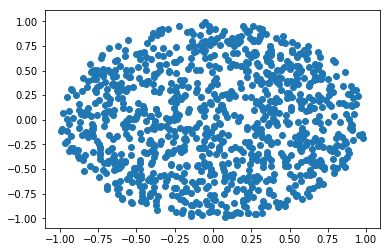

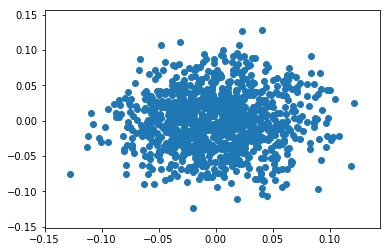

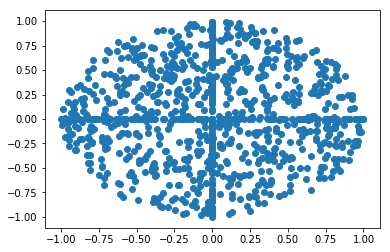

In [17]:
plt.figure();
plt.scatter( *mcmc2d(samples = 1000, delta = 1.00));
plt.figure();
plt.scatter( *mcmc2d(samples = 1000, delta = 0.01) )
plt.figure();
plt.scatter( *mcmc2d(samples = 1000, delta = 20) );


(β) Η εκτίμιση του όγκου μπάλλας d διαστάσεων με MCMC δίνεται παρακάτω: 

In [19]:
import numpy as np

def mcmc_volume(dmax = 10, N = 100, delta = 1.0):
    samples = 1000 
    D = {}
    D[1] = 2 
    for d in range(1, dmax + 1):
        points = []
        for _ in range(samples):
            x = np.zeros(d)  
            R_sq = 0.0  

            for _ in range(N):
                k = r.choice(range(d))  
                z = r.uniform(-delta,delta) 
                x_prop_k = x[k] + z   
                R_sqprop = R_sq - x[k]**2+ x_prop_k**2 
                if R_sqprop < 1.0: 
                    R_sq = R_sqprop
                    x[k]= x_prop_k   
                    points.append(x)
        Npoints = len(points)
        Nhits = 0
        # cylinder
        for p in points:   
            xc = r.uniform(-delta, delta)
            R_sq = xc**2 + sum([g**2 for g in p])
            if R_sq <= 1: # p and xc are in D_{d+1}
                Nhits += 1
        ratio = Nhits / Npoints 
        # recurrence relation regarding ratii
        D[d + 1] = D[d] * ratio * 2
        
    return D

D = mcmc_volume(100)
print(D)        
        
        

{1: 2, 2: 3.096890874757307, 3: 4.114119111241956, 4: 4.974603049864771, 5: 5.325204195, 6: 5.285363362771865, 7: 4.836044652186999, 8: 4.1348605082966685, 9: 3.3071483266537482, 10: 2.5103641317796233, 11: 1.8587635629496582, 12: 1.3321258612622093, 13: 0.8940296655805006, 14: 0.6042165126909473, 15: 0.38218855348892894, 16: 0.23513394136722687, 17: 0.13647687716349804, 18: 0.07977773067492776, 19: 0.04555928672578338, 20: 0.024722314223618234, 21: 0.013563247248732683, 22: 0.0071463279915378675, 23: 0.0037134970858072832, 24: 0.0018756023265284623, 25: 0.0009215215434761927, 26: 0.0004411174483754942, 27: 0.00020713391726948636, 28: 9.930843189057578e-05, 29: 4.496295449925996e-05, 30: 1.9044978077301604e-05, 31: 8.348373753902023e-06, 32: 3.7014691323390375e-06, 33: 1.6248964487692854e-06, 34: 6.881998098955685e-07, 35: 2.885180498190302e-07, 36: 1.1271613299940359e-07, 37: 4.6366847729546455e-08, 38: 1.8882121879998807e-08, 39: 7.331926610990793e-09, 40: 2.8448483590216715e-09, 41:

In [20]:
# print results 
rerror = {}
for d in D.keys():
    Vactual = Vol1(d)
    r = abs(Vactual - D[d]) / Vactual
    print('MCMC Estimate for d = {} : {}, Actual = {}, (Abs) Relative Error = {}'.format(d, D[d], Vactual,  r))
    rerror[d] = r

MCMC Estimate for d = 1 : 2, Actual = 1.9999999999999998, (Abs) Relative Error = 1.1102230246251568e-16
MCMC Estimate for d = 2 : 3.096890874757307, Actual = 3.141592653589793, (Abs) Relative Error = 0.014229018132381583
MCMC Estimate for d = 3 : 4.114119111241956, Actual = 4.1887902047863905, (Abs) Relative Error = 0.017826410465511172
MCMC Estimate for d = 4 : 4.974603049864771, Actual = 4.934802200544679, (Abs) Relative Error = 0.00806533832616413
MCMC Estimate for d = 5 : 5.325204195, Actual = 5.263789013914325, (Abs) Relative Error = 0.01166748532726718
MCMC Estimate for d = 6 : 5.285363362771865, Actual = 5.167712780049969, (Abs) Relative Error = 0.022766470918447263
MCMC Estimate for d = 7 : 4.836044652186999, Actual = 4.7247659703314016, (Abs) Relative Error = 0.023552210322026187
MCMC Estimate for d = 8 : 4.1348605082966685, Actual = 4.058712126416768, (Abs) Relative Error = 0.01876171049044774
MCMC Estimate for d = 9 : 3.3071483266537482, Actual = 3.2985089027387064, (Abs) Re

Το γράφημα του σχετικού σφάλματος (log) σε σχέση με τη διάσταση δίνεται παρακάτω. Παρατηρούμε ότι αυξάνεται όπως είναι αναμενόμενο όσο μεγαλώνει το d. 

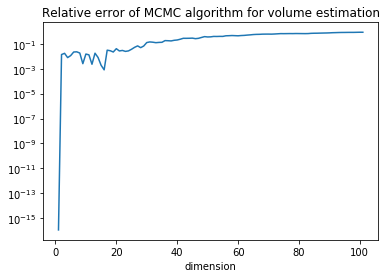

In [23]:
plt.semilogy(rerror.keys(), rerror.values());    
plt.title('Relative error of MCMC algorithm for volume estimation');
plt.xlabel('dimension');

### Αναφορές

[1] Jaekel, Uwe. "A Monte Carlo method for high-dimensional volume estimation and application to polytopes." Procedia Computer Science 4 (2011): 1403-1411.

[2] Λουλάκης Μιχαήλ, Στοχαστικές Ανελίξεις, Σημειώσεις στον Κάλιππο